# CSC2515 Assignment #2
**By: Ramy ElMallah, Alexis Bruneau, Anton Korikov** \
Submitted to: Prof. Amir-massoud Farahmand

In [1]:
#Q1e
import numpy as np
import math

def q1e(N=10):
  MU = 1
  SIGMA2 = 9
# 15*1/N
  Lambda = np.arange(0, 1.5, 0.005)
  Bias = [(((1/(1+L)-1)**2)*(MU**2)) for L in Lambda]
  Variance = [(SIGMA2)/(N*((1+L)**2)) for L in Lambda]
  Error = [a + b for a, b in zip(Bias, Variance)]

  import matplotlib.pyplot as plt
  from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

  ax = plt.plot(Lambda, Bias, label="Bias")[0].figure.axes
  plt.plot(Lambda, Variance, label="Variance")
  plt.plot(Lambda, Error, label="Error")
  plt.xlabel("lambda")
  plt.ylabel("Expected value of error")
  plt.legend()
  ax[0].xaxis.set_major_locator(MultipleLocator(0.5))
  ax[0].yaxis.set_major_locator(MultipleLocator(0.5))
  ax[0].xaxis.set_minor_locator(AutoMinorLocator(2))
  ax[0].yaxis.set_minor_locator(AutoMinorLocator(20))
  plt.ylim(0,1)
  plt.title(f"Regularized Mean Estimator Squared error decomposition (n={N})")
  plt.grid(axis='both', which='both')
  plt.show()

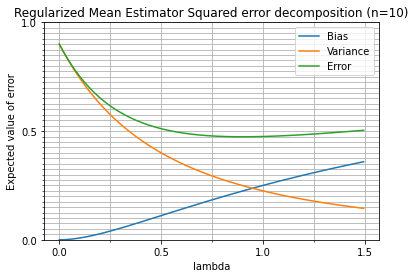

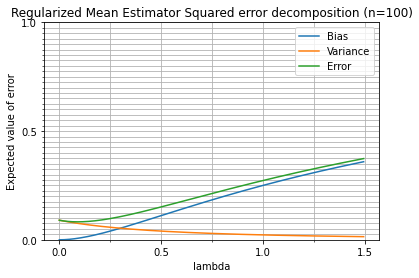

In [2]:
q1e(10)
q1e(100)

As the number of samples (n) increases, we can see that the expected bias stays the same but variance decreases along with the expected squared error when compared using the same value of lambda. When lambda is zero, the bias is zero and increases as lambda increases irregardless of the number of samples. As lambda increases, the expected bias increases and variance decreases. So, with a larger number of samples, where the expected variance is lower, a smaller value of lambda will achieve the smallest expected squared error.


In [3]:
# Q2d as tau->0
#dataset of three training points
x_train = np.array([(0, 1), (0, 0), (0.5, 0.5)])
x_test = np.array([(0.1, 0.9), (0.1, -0.1), (0.5, 0.5), (0,0.35)])

def calc_A(X, x, tau):
  a = [math.exp(-(np.linalg.norm(x-x_i)**2)/(2*tau**2)) for x_i in X]
  b = sum([math.exp(-(np.linalg.norm(x-x_j)**2)/(2*tau**2)) for x_j in X])
  print(a, b)
  return np.diag([a_i/b for a_i in a])

for x in x_test:
  print(calc_A(x_train, x, 0.01))

[3.720075976020836e-44, 0.0, 0.0] 3.720075976020836e-44
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[0.0, 3.72007597602073e-44, 0.0] 3.72007597602073e-44
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
[0.0, 0.0, 1.0] 1.0
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
[0.0, 9.877108721521013e-267, 0.0] 9.877108721521013e-267
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


## Question 3

In [4]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files
import seaborn as sn
import scipy
from sklearn.metrics import r2_score
import math; from scipy.linalg import LinAlgWarning; import warnings
warnings.filterwarnings(action='ignore', category=LinAlgWarning)
from sklearn.metrics import d2_tweedie_score


## 3.1 Initial Data Analysis

### (a) Load Capital Bikesharing Dataset

In [5]:
uploaded = files.upload()

Saving hour.csv to hour.csv


In [6]:
!unzip Bike-Sharing-Dataset.zip

unzip:  cannot find or open Bike-Sharing-Dataset.zip, Bike-Sharing-Dataset.zip.zip or Bike-Sharing-Dataset.zip.ZIP.


In [7]:
data = pd.read_csv('hour.csv')
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### (b) Describe and summarize data, number of data points, dimensions, and used data types

In [8]:
print(f'The data has {len(data)} samples')

The data has 17379 samples


The data has 17379 samples with 16 features (some are dependent)


Each sample has the following features:

- dteday : date - string
- season : season (1:winter, 2:spring, 3:summer, 4:fall) - integer
- yr : year (0: 2011, 1:2012) - integer
- mnth : month ( 1 to 12) - integer
- hr : hour (0 to 23) - integer
- holiday : weather day is holiday or not (0 or 1) - integer
- weekday : day of the week - integer
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0  - integer
+ weathersit :  - integer
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale) - float
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale) - float
- hum: Normalized humidity. The values are divided to 100 (max) - float
- windspeed: Normalized wind speed. The values are divided to 67 (max) - float
- casual: count of casual users - integer
- registered: count of registered users - integer
- cnt: count of total rental bikes including both casual and registered - integer



### (c)  Present a single grid containing plots for each feature against the target. Choose the appropriate axis for dependent vs. independent variables.


In [9]:
# Find the top 10 most popular values for dteday (only keep those values in graph)
dteday_list_clean = [] #Append small number of dates 
dteday_list = data['dteday'].unique().tolist()
n = len(dteday_list)
for i in range(0,n,100):
  dteday_list_clean.append(dteday_list[i])



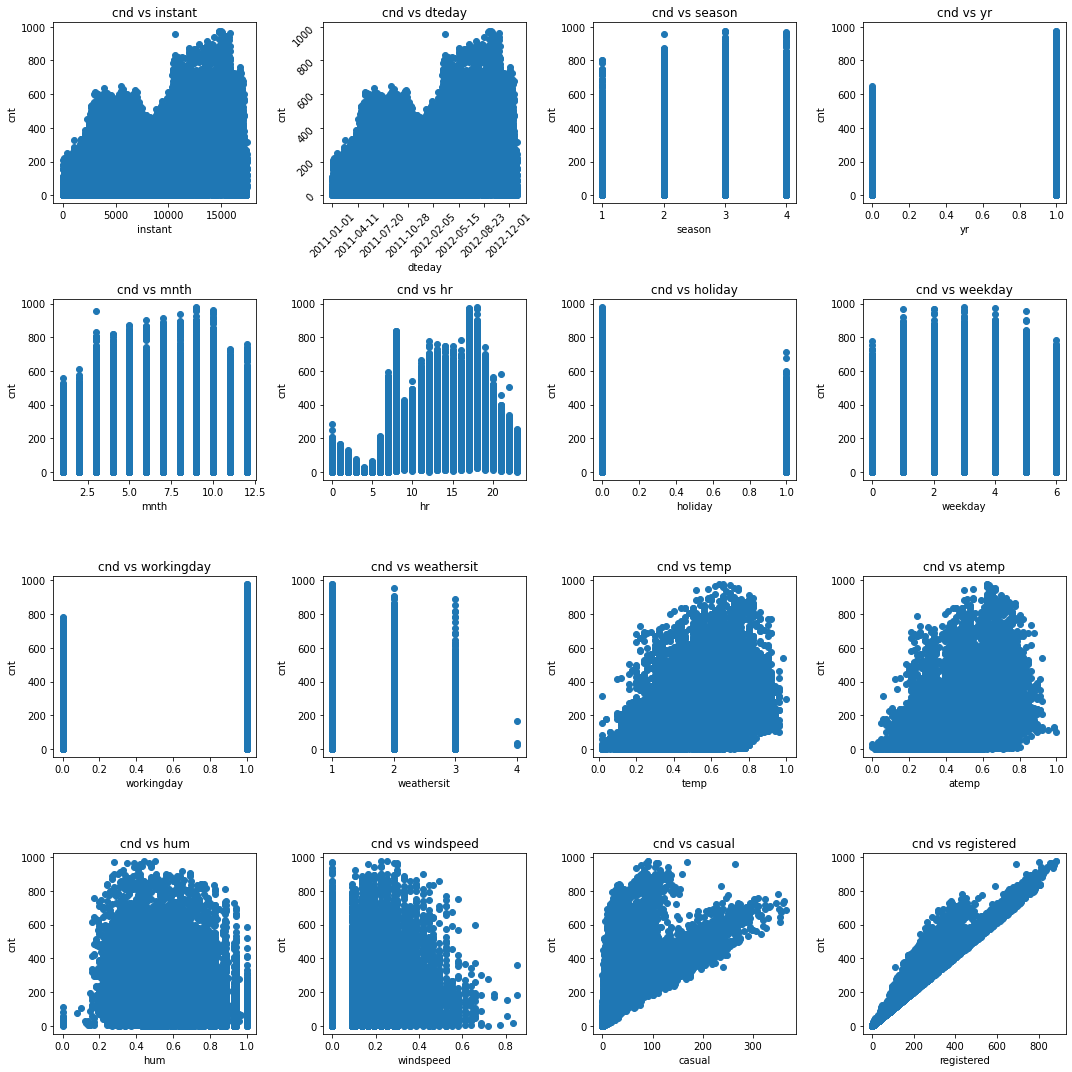

In [10]:
#cnt is the target (dependent variable) and features are independent
fig, axs = plt.subplots(nrows = 4, ncols=4, figsize = (15,15))

#Create axes (x and y)
x =[]
y = data['cnt']

#Loop through all features
for features in data:
    if features != 'cnt':
        x.append(data[features])      
        
# Plot all subplots
count_i = 0
count_j = 0

#Need to know which type of plot to show
for i in range(len(x)):    
 
  if count_i == 0 and count_j == 1:
    axs[count_i,count_j].scatter(x[i],y)
    axs[count_i,count_j].set_xticks(dteday_list_clean)
    axs[count_i,count_j].set_title(f'cnd vs {data.columns[i]}')  
    axs[count_i,count_j].set_xlabel(data.columns[i])
    axs[count_i,count_j].tick_params(labelrotation=45)
    axs[count_i,count_j].set_ylabel('cnt')  
  else:
    axs[count_i,count_j].scatter(x[i],y)
    axs[count_i,count_j].set_title(f'cnd vs {data.columns[i]}')  
    axs[count_i,count_j].set_xlabel(data.columns[i])
    axs[count_i,count_j].set_ylabel('cnt')    

  if count_j == 3:
      count_j = -1
      count_i +=1
        
  count_j +=1

plt.tight_layout()
plt.show()
plt.clf()
plt.close()

### (d)  Perform a correlation analysis on the data and plot the correlation matrix as a colored image. State which feature is the most positively, most negatively, and least correlated with the target column cnt.


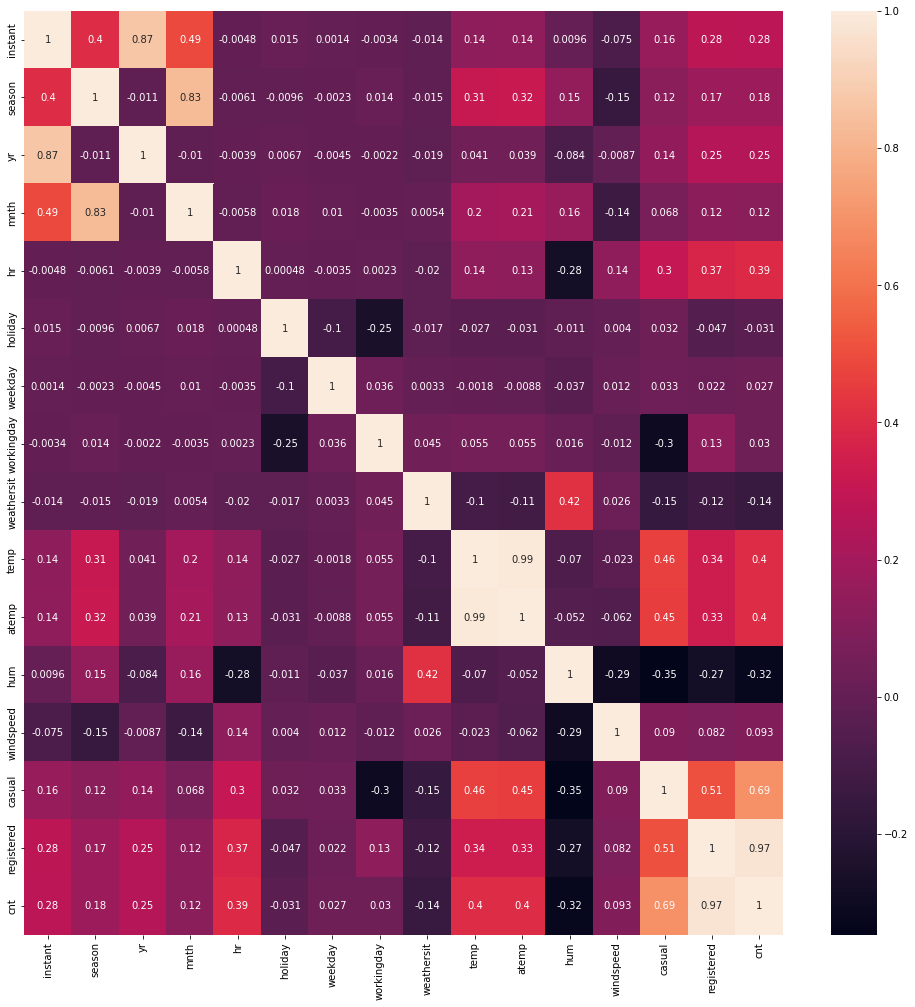

In [11]:
#Calcualte the correlation matrix
corr = data.corr()
plt.figure(figsize=(17,17))

#Plot the heatmap
sn.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True)

### (e)  Drop the following columns from the dataframe: instant, atemp, registered, casual, dteday

In [12]:
data = data.drop(columns=["instant", "atemp", "registered", "casual", "dteday"])

### (f)  Shuffle the dataframe’s rows using sklearn.utils.shuffle with random state 0. Split the data into a training set and a test set on index 10000.


In [13]:
data = sklearn.utils.shuffle(data, random_state=0)

In [14]:
train_data = data[0:10000]
test_data = data[10000:]

In [15]:
train_data

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
3439,2,0,5,5,0,6,0,1,0.56,0.88,0.2239,7
6542,4,0,10,4,0,3,1,1,0.44,0.88,0.0000,5
15470,4,1,10,19,0,4,1,1,0.44,0.51,0.1343,743
9851,1,1,2,11,1,1,0,1,0.26,0.48,0.3582,208
12640,2,1,6,21,0,5,1,1,0.66,0.50,0.1045,333
...,...,...,...,...,...,...,...,...,...,...,...,...
14422,3,1,8,3,0,3,1,1,0.62,0.73,0.1045,9
14848,3,1,9,21,0,6,0,1,0.56,0.52,0.1045,296
11359,2,1,4,12,0,1,1,3,0.34,0.71,0.3582,129
5646,3,0,8,17,0,0,0,1,0.76,0.40,0.2985,398


In [16]:
test_data

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
2435,2,0,4,9,0,6,0,3,0.40,1.00,0.2985,29
11303,2,1,4,4,0,6,0,1,0.50,0.82,0.2537,9
2139,2,0,4,0,0,1,1,1,0.40,0.50,0.2239,6
3614,2,0,6,12,0,6,0,1,0.70,0.32,0.1642,420
1975,2,0,3,3,0,1,1,1,0.22,0.44,0.1642,2
...,...,...,...,...,...,...,...,...,...,...,...,...
9225,1,1,1,7,0,3,1,1,0.24,0.75,0.2239,257
13123,3,1,7,0,0,5,1,1,0.78,0.62,0.1343,102
9845,1,1,2,5,1,1,0,2,0.24,0.60,0.3582,6
10799,2,1,3,2,0,6,0,2,0.42,0.77,0.2537,69


## 3.2 Regression Implementations

### (a)  Implement the ordinary least squares regression algorithm as discussed in class. You are free to implement the closed form solution.


In [17]:
def ordinary_least_squares_regression(X, y, use_solver=False):
  X = np.insert(X.to_numpy(), 0, values=1, axis=1) # add one column for bias 
  y = y.to_numpy()
  a = np.dot(X.T, X)
  b = np.dot(X.T, y)
  if use_solver:
    wb = scipy.linalg.solve(a, b)
  else:
    wb = np.dot(np.linalg.inv(a), b)
  return wb[0], wb[1:]


In [18]:
X_train = train_data.drop(columns=["cnt"])
y_train = train_data["cnt"]
X_test = test_data.drop(columns=["cnt"])
y_test = test_data["cnt"]

### (b) Fit the ordinary least squares regression model to the pre-processed data. Report the coefficient of determination, also known as the R2 score, of your model. 

In [19]:
b, w = ordinary_least_squares_regression(X_train, y_train, use_solver=True)

In [20]:
print(f"R2 on Training Data is {r2_score(y_train, np.dot(X_train.to_numpy(), w)+b):.4f}")
print(f"R2 on Test Data is {r2_score(y_test, np.dot(X_test.to_numpy(), w)+b):.4f}")

R2 on Training Data is 0.3952
R2 on Test Data is 0.3769


### (c)  You will find that the fit of the model is not very good. This is in part due to the fact that the dataset contains categorical input variables. So far, your implementation uses these categorical features as continuous inputs, which leads to not so good performance. Instead, it is advised to explicitly encode these input variables as categorical variables. Recall that one way of dealing with categorical variables is to replace them with 1-hot-encoded vectors. The following columns in the dataframe are known to be categorical: season, mnth, hr, weekday, weathersit. Substitute these features with 1-hot-encoded vectors in the dataframe. Use this dataframe for all upcoming questions. Make sure that you split the dataframe as described in Question 3.1 (f).

In [21]:
#switch categorical features to one-hot encoding
data_new = pd.get_dummies(data=data, columns=["season", "mnth", "hr", "weekday", "weathersit"])
X_train_new = data_new[0:10000].drop(columns=["cnt"])
X_test_new = data_new[10000:].drop(columns=["cnt"])


### (d) Re-fit the model with the new data and report the updated R2 score.


In [22]:
b2, w2 = ordinary_least_squares_regression(X_train_new, y_train, use_solver=True)
print(f"R2 on Training Data is {r2_score(y_train, np.dot(X_train_new.to_numpy(), w2)+b2):.4f}")
print(f"R2 on Test Data is {r2_score(y_test, np.dot(X_test_new.to_numpy(), w2)+b2):.4f}")
w_ols = []
w_ols.append(b2)
w_ols.extend(w2.tolist())


R2 on Training Data is 0.6879
R2 on Test Data is 0.6818


### (e)  Implement the locally weighted regression algorithm as described in Question 2.

In [23]:
def calc_A(X, x, tau):
  a = [math.exp(-(np.linalg.norm(x-x_i)**2)/(2*tau**2)) for x_i in X]
  b = sum([math.exp(-(np.linalg.norm(x-x_j)**2)/(2*tau**2)) for x_j in X])
  return np.diag([a_i/b for a_i in a])

def locally_weighted_regression(X, y, x, tau=1, use_solver=True, ignore_small_a=False):
  X = np.insert(X.to_numpy(), 0, values=1, axis=1) # add one column for bias 
  y = y.to_numpy()
  A = calc_A(X, x, tau)
  if ignore_small_a:
    A[np.abs(A) < np.finfo(float).eps*100] = 0
  a = np.dot(np.dot(X.T, A), X)
  b = np.dot(np.dot(X.T, A), y)
  if use_solver:
    wb = scipy.linalg.solve(a, b)
  else:
    wb = np.dot(np.linalg.inv(a), b)
  return wb #includes bias in the beginning

### (f)   Fit the locally weighted regression model to the data with τ = 1. Report the R2 score of your model. Verify whether and describe how the expected behaviour for τ → 0 and τ → ∞ as described in your answer to Question 2 holds.For this question, you may use a reduced test set with the first 200 samples from the full test set. If you do so, please mark this clearly on your solution.


In [24]:
# Get the weights and make a prediction for each sample in the test set
MAX_NUMBER = 200
y_preds = []
import time
s = time.time()
for x in np.insert(X_test_new.head(MAX_NUMBER).to_numpy(), 0, values=1, axis=1):
  wb = locally_weighted_regression(X_train_new, y_train, x)
  y_pred = np.dot(x, wb)
  print('.', end=' ')
  y_preds.append(y_pred)
print(f"R2 on Test Data is {r2_score(y_test.head(MAX_NUMBER), y_preds):.4f}")

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . R2 on Test Data is 0.8401


In [25]:
# verify tau behavior
# tau -> 0
A_0 = calc_A(X_train_new.to_numpy(), X_train_new.to_numpy()[0], 0.001)
print(A_0)
# tau -> inf
A_inf = calc_A(X_train_new.to_numpy(), X_train_new.to_numpy()[0], 99999)
print(A_inf*10000)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [26]:
MAX_NUMBER = 200
y_preds = []
for x in np.insert(X_test_new.head(MAX_NUMBER).to_numpy(), 0, values=1, axis=1):
  wb = locally_weighted_regression(X_train_new, y_train, x, tau=0.5)
  y_pred = np.dot(x, wb)
  y_preds.append(y_pred)
print(f"R2 on Test Data for Tau->0 is {r2_score(y_test.head(MAX_NUMBER), y_preds):.4f}")
y_preds = []
for x in np.insert(X_test_new.head(MAX_NUMBER).to_numpy(), 0, values=1, axis=1):
  wb = locally_weighted_regression(X_train_new, y_train, x, tau=99999)
  y_pred = np.dot(x, wb)
  y_preds.append(y_pred)
print(f"R2 on Test Data for Tau->inf is {r2_score(y_test.head(MAX_NUMBER), y_preds):.4f}")

R2 on Test Data for Tau->0 is 0.9014
R2 on Test Data for Tau->inf is 0.6879


In [27]:
# trying to parallelize the LWR but it took about the same time due to the overhead
from joblib import Parallel, delayed
def process(x):
  wb = locally_weighted_regression(X_train_new, y_train, x, ignore_small_a=True)
  print('.', end=' ')
  return np.dot(x, wb)
    
y_preds = Parallel(n_jobs=4)(delayed(process)(x) for x in np.insert(X_test_new.head(MAX_NUMBER).to_numpy(), 0, values=1, axis=1))
print(y_preds)

[56.17761441494997, 65.71026008463875, 6.907855258634754, 356.4570625809257, -67.28290452461054, 220.97975261978343, 240.36146277670903, 339.68776388136143, -3.6629631093527397, -10.98657605069485, 79.1307233475377, 222.60283113223295, 121.75894908276487, 381.55554788707263, 184.79183040890527, 231.24325468528673, -91.0113094636626, 203.480620482924, 225.37103654874352, 107.60386693165253, -1.325776140417986, 353.06291019584535, 48.44219546469219, 233.1850838462817, 158.47840160436363, 15.114032326927575, 78.158770039185, 305.3979463120495, -32.372707555796175, 290.877505992857, 257.38751423770645, 26.822245911080795, 359.2598928893286, 450.8094659980591, 80.50658194833437, 469.401090677507, -34.47575209666317, -4.223533312370378, 94.57402631864278, 63.58359408418613, 198.67010137470254, 164.51680779176473, 225.90310906302562, 522.8143322521591, 301.97408005883347, 328.40237275010713, 289.3535660510956, 145.48749988654825, 339.30132169667047, 261.828867529564, 49.22088555031837, 84.444

### (g)   Plot a histogram of the target variable. What distribution does the target follow?


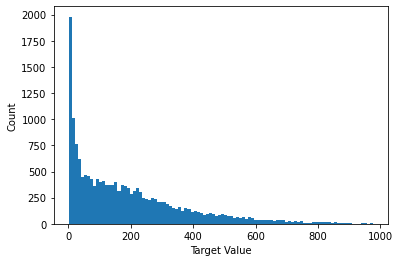

In [28]:
plt.hist(data['cnt'], bins=100)
plt.xlabel("Target Value")
plt.ylabel("Count")
plt.show()

##Q3 h) Implement the Poisson regression algorithm

In [29]:
import autograd.numpy as np
import autograd

def poissonNegLogLiklihood (w,X,y):
  #w is numpy float vector of dimension len(X[0])
  negLogL = -np.mean(np.dot(X,w)*y - np.exp(np.dot(X,w)))

  return negLogL

#gradient w.r.t  w
#NOTE: df_dx has same arguments as poissonNegLogLiklihood: (w,X,y)
df_dw = autograd.grad(poissonNegLogLiklihood, 0)

In [30]:
#implement gradient descent
#------------------------------
X = X_train_new
y = y_train

X = np.insert(X.to_numpy(), 0, values=1.0, axis=1) # add one column for bias 
y = y.to_numpy()

# hyperparameters
LEARNING_RATE = 0.001

#initialize w
INITIAL_w = np.asarray([0.0001]*X.shape[1])
w = np.copy(INITIAL_w)

#number of iterations
N_ITER = 50000

##Q3 i) 

In [31]:
for i in range(N_ITER):
    delta = -LEARNING_RATE*df_dw(w,X,y)  # compute gradient times learning rate
    w += delta  # update params

In [32]:
#predicted value of y^i is \lambda = exp(w^T X[i])
X = X_test_new
X = np.insert(X.to_numpy(), 0, values=1.0, axis=1) 
y_pred_poisson = [np.exp(np.dot(w.T,X[i])) for i in range(len(y_test))]

D_score = d2_tweedie_score(y_test, y_pred_poisson, power=1)

In [33]:
D_score

0.8014495612708745

Thus, roughly 80% of the tweedy deviance is explained by the model.

## Q3 j)

In [34]:
print(X_train_new.columns)
# print(len(X_train_new.columns))
# print(len(w_ols))
# print(len(w))
# normalized_w = []
# for i, feature in enumerate(X_train_new.columns):
#   mean = X_train_new[feature].mean()
#   std = X_train_new[feature].std()
#   normalized_w.append((w_ols[i+1]*mean)/std)
# print(normalized_w)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_1',
       'season_2', 'season_3', 'season_4', 'mnth_1', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5',
       'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13',
       'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21',
       'hr_22', 'hr_23', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1', 'weathersit_2',
       'weathersit_3', 'weathersit_4'],
      dtype='object')


## Linear Regression


### Final weights:

In [35]:
print(np.array(w_ols))
w_ols_abs = abs(np.array(w_ols))
print("MAX", X_train_new.columns[np.argmax(w_ols_abs)-1], max(w_ols_abs))
print("MIN", X_train_new.columns[np.argmin(w_ols_abs)-1], min(w_ols_abs))


[-1030.96454885    83.95015855  -481.27919214  -448.63355803
   258.88030375   -88.76921633   -28.82720772  4835.23461396
  4878.28311753  4868.46224251  4902.54826255 -9212.06295502
 -9211.19286831 -9205.14172498 -9214.59279014 -9204.26359885
 -9222.36912301 -9237.03181298 -9218.68758567 -9188.68417263
 -9203.48690172 -9225.30099674 -9218.76010782  6809.73157543
  6791.54117174  6782.15371602  6773.93164589  6770.91494452
  6788.16843782  6846.32773943  6983.66763132  7112.74437381
  6971.71760629  6916.11984881  6942.70675405  6975.4210751
  6971.59409369  6951.39565069  6971.31027107  7027.31382045
  7185.30699813  7153.52152484  7039.90038997  6961.08708512
  6913.34543806  6878.78321578  6836.75724844   418.54107335
   876.19515652   875.33129242   881.25976712   877.7476554
   880.57883026   429.25163269 -1898.20712621 -1909.44306178
 -1961.91500566 -1981.07858026]
MAX mnth_7 9237.031812979487
MIN windspeed 28.827207723687458


### Feature Significance

The  most significant features was the month 'mnth_7' (coefficient value -9237), which correspond to the month of July. The least significant feature was the windspeed (coefficient value = -28)

## Poisson Regression

### Final weights:

In [36]:
print(w)
print("MAX", X_train_new.columns[np.argmax(abs(w))-1], max(abs(w)))
print("MIN", X_train_new.columns[np.argmin(abs(w))-1], min(abs(w)))

[ 1.93804509  0.46505851  0.28754496  0.46968569  1.14043159 -0.21654684
 -0.11213129  0.22571599  0.52923952  0.48882584  0.69456374  0.05084188
  0.15851651  0.22324384  0.18798777  0.22203052  0.15688732  0.10052232
  0.17199245  0.29500886  0.19465482  0.08868867  0.08877012 -0.66503848
 -1.12429854 -1.5393485  -2.17533397 -2.79320919 -1.6164983  -0.28128309
  0.76081076  1.21988425  0.70995698  0.43659659  0.58716574  0.73438538
  0.7236487   0.64212001  0.72787505  0.92527535  1.33740595  1.2748264
  0.97923054  0.68039228  0.42663015  0.16498463 -0.19583361  0.56418927
  0.1368542   0.13520642  0.15871753  0.15452773  0.17222476  0.61692517
  0.84202877  0.78011702  0.35196607 -0.03576677]
MAX hr_4 2.7932091859680477
MIN weathersit_4 0.035766768442616


### Feature Significance

The two most significant features were the hours 'hr_4' and 'hr_5' (coefficient values (-2.175,-2.793) respectively), which correspond to the times between 4-5AM and 5-6AM. This results makes sense, since very little travel is expected at such early hours. The least significant feature was the weather situation 'weathersit_4' (coefficient value = 0.035)